In [2]:

# core code for predicting the shear strength using AdaBoost
# v 0.1
# 2019-7-14

# define some necessary packages
import os
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from openpyxl import load_workbook
from sklearn.model_selection import cross_val_predict
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib
matplotlib.rcParams['mathtext.fontset']='stix'

In [4]:
# load the full data set
dataset = pd.read_excel('C:/Users/admin/Desktop/20201229/corr_beam.xlsx', sheet_name='corr_beam')
dataset.head()


,fc,b,h,rho_l,rho_v,fy,fyv,s,lambda_s,eta_l,eta_w,h0,y
0,33.40,254,610,1.90,0.39,441,496,254,2.04,0.00,13.20,521.0,507.0
1,20.93,120,230,2.62,0.56,435,464,150,1.50,0.00,11.73,184.0,129.0
2,20.00,150,180,2.26,0.19,369,332,200,2.20,8.60,5.10,130.0,68.0
3,25.00,150,200,2.30,0.25,210,275,150,2.20,3.14,2.75,166.0,79.0
4,33.10,140,220,1.48,0.90,580,560,80,1.76,0.00,24.31,170.0,90.0


In [8]:
# define Input variables X and output variable y
# 13 variables as followed: f_c;b;h;rho_l;rho_v;f_y;f_yv;s;lambda;eta_l;eta_w;h0;A_v	

fc = dataset.loc[:, 'fc']
# fc.head()
b = dataset.loc[:, 'b']
# b.head()
h = dataset.loc[:, 'h']
# h
rho_l = dataset.loc[:, 'rho_l']
# rho_l
rho_v = dataset.loc[:, 'rho_v']
# rho_v
fy = dataset.loc[:, 'fy']
# fy
fyv = dataset.loc[:, 'fyv']
# fyv
s = dataset.loc[:, 's']
# s
lambda_s = dataset.loc[:, 'lambda_s']
# lambda_s
eta_l = dataset.loc[:, 'eta_l']
# eta_l
eta_w = dataset.loc[:, 'eta_w']
# eta_w
h0 = dataset.loc[:, 'h0']
# h0

In [10]:
X = np.zeros(shape=(158,6))
X[:, 0] = lambda_s
X[:, 1] = h0/b
X[:, 2] = rho_l * fy / fc
X[:, 3] = rho_v * fyv / fc
X[:, 4] = eta_l
X[:, 5] = eta_w

y = dataset.loc [0:158, 'y']   # shear strength

In [11]:
# normalize the data sets
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# split the training-testing set into 10 folds
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5)

In [20]:
# DT
# regr_1 = DecisionTreeRegressor(max_depth=80,max_leaf_nodes=100,min_samples_leaf=1,min_samples_split=2,random_state=2)

# RF
# regr_2 = RandomForestRegressor(n_estimators=200, max_depth=80,max_leaf_nodes=300,min_samples_leaf=1,min_samples_split=2,random_state=0)

# GBRT
regr_1 = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05,max_depth=2,max_leaf_nodes=5,min_samples_leaf=1,min_samples_split=2, random_state=0, loss='ls')

# AdaBoost
# regr_4 = AdaBoostRegressor(tree.DecisionTreeRegressor(max_depth=80,max_leaf_nodes=300,min_samples_leaf=1,min_samples_split=2,random_state=0),	n_estimators=200, learning_rate=0.8)


scores = cross_val_score (regr_1, X_train, y_train, cv=10, scoring='r2', n_jobs = -1)
print('10-fold R^2:', scores.mean())

scores = cross_val_score (regr_1, X_train, y_train, cv=10, scoring='neg_mean_squared_error', n_jobs = -1)
print('10-fold RMSE:', np.mean(np.sqrt( -scores)))

scores = cross_val_score (regr_1, X_train, y_train, cv=10, scoring='neg_mean_absolute_error', n_jobs = -1)
print('10-fold MAE:', -scores.mean())

10-fold R^2: 0.7119441326609117
10-fold RMSE: 22.556864197388556
10-fold MAE: 15.53659228637738


In [21]:
# training the learner
regr_1.fit(X_train, y_train)

# predict the results
Z1 = regr_1.predict(X_train)
Z2 = regr_1.predict(X_test)


print("GBRT Training RMSE:", np.sqrt(mean_squared_error(y_train, Z1)), "MAE:", mean_absolute_error(y_train, Z1), "R2:", r2_score(y_train, Z1))
print("GBRT Testing RMSE:", np.sqrt(mean_squared_error(y_test, Z2)), "MAE:", mean_absolute_error(y_test, Z2), "R2:", r2_score(y_test, Z2))

GBRT Training RMSE: 11.08290480400761 MAE: 8.152859603729743 R2: 0.9864231483338094
GBRT Testing RMSE: 19.191396252694407 MAE: 12.840083358363614 R2: 0.9553986369604238


In [22]:
##X_train = scaler.inverse_transform(X_train)
##print(X_train[:, 5])
##print(y_train)
##print(Z1)
##X_test = scaler.inverse_transform(X_test)
##print(X_test[:, 5])
##print(y_test)
##print(Z2)



In [23]:

##xx_test = [[1,1.3917,28.6691,3.1587,0,0],
##            [1,1.3917,28.6691,3.1587,0,0],
##            [1,1.3917,28.6691,3.1587,0,0],
##            [1,1.3917,28.6691,3.1587,0,0],
##            [1,1.3917,28.6691,3.1587,0,8.3746],
##            [1,1.3917,28.6691,3.1587,0,21.5831],
##             [1,1.3917,28.6691,3.1587,0,31.1602],
##            [1,1.3917,28.6691,3.1587,0,39.0631],
##            [1,1.3917,28.6691,3.1587,0,45.8741],
##             [1,1.3917,28.6691,3.1587,0,51.8749],
##            [1,1.3917,28.6691,3.1587,0,57.2313],
##            [1,1.3917,28.6691,3.1587,0,62.0518]]

##xx_test = [[2,1.3250,20.9625,1.6103,0,0],
##            [2,1.3250,20.9625,1.6103,0,0],
##            [2,1.3250,20.9625,1.6103,0,10.2427],
##             [2,1.3250,20.9625,1.6103,0,30.1401],
##            [2,1.3250,20.9625,1.6103,0,43.6124],
##            [2,1.3250,20.9625,1.6103,0,54.2122],
##             [2,1.3250,20.9625,1.6103,0,62.9282],
##            [2,1.3250,20.9625,1.6103,0,70.2340],
##            [2,1.3250,20.9625,1.6103,0,76.4075],
##            [2,1.3250,20.9625,1.6103,0,81.6314],
##            [2,1.3250,20.9625,1.6103,0,86.0349],
##            [2,1.3250,20.9625,1.6103,0,89.7143]]

In [24]:
xx_test = [[1.0000,0.8333,28.6691,3.1587,0,32.0500],
           [1.0000,1.2500,28.6691,3.1587,0,32.0500],
           [1.0000,1.6667,28.6691,3.1587,0,32.0500],
           [1.0000,2.0833,28.6691,3.1587,0,32.0500],
           [1.0000,2.5000,28.6691,3.1587,0,32.0500],
           [1.0000,2.9167,28.6691,3.1587,0,32.0500],
           [1.0000,3.3333,28.6691,3.1587,0,32.0500],
           [1.0000,3.7500,28.6691,3.1587,0,32.0500],
           [1.0000,4.1667,28.6691,3.1587,0,32.0500],
           [1.0000,4.5833,28.6691,3.1587,0,32.0500]]


xx_test = scaler.transform(xx_test)
zz = regr_1.predict(xx_test)
print(zz)

[ 83.86721098 101.2626052  138.83462861 458.39334808 458.39334808
 458.39334808 458.39334808 458.39334808 458.39334808 458.39334808]


In [25]:
# predicted = cross_val_predict (regr_1, X_train, y_train, cv=10)
predicted = Z1
# AdaBoost results
X_inp1 = np.concatenate((X_train, X_test))
print(X_inp1.shape)
X_inp = scaler.inverse_transform(X_inp1)

y_ture = np.concatenate((y_train, y_test))
y_pre = np.concatenate((predicted, Z2))
print("GBRT RMSE:", np.sqrt(mean_squared_error(y_ture, y_pre)), "R2:", r2_score(y_ture, y_pre), "MAE:", mean_absolute_error(y_ture, y_pre))

ratio = y_pre/y_ture
print(np.mean(ratio), np.std(ratio, ddof=1))


(158, 6)
GBRT RMSE: 14.050147709606279 R2: 0.9775862277843718 MAE: 9.576826313998263
1.0277409448058386 0.14578652058475564


In [26]:
writer = pd.ExcelWriter('ratio.xlsx',engin='openpyxl')
#book = load_workbook(writer.path)
#writer.book = book
df1 = pd.DataFrame({'eta_w':X_inp[:,5]/100})
df2 = pd.DataFrame({'y_ture':y_ture})
df3 = pd.DataFrame({'y_pre':y_pre})
df1.to_excel(writer,startcol=0,index=False)
df2.to_excel(writer,startcol=1,index=False)
df3.to_excel(writer,startcol=2,index=False)
writer.save()
writer.close()

In [27]:
# ##xx_test = np.array(xx_test).reshape(1, -1)
# xx_test = scaler.transform(xx_test)
# zz = regr_1.predict(xx_test)
# print(zz)

##print("Training R of this fold :", np.sqrt(r2_score(y_train, Z1)))
##print("Testing R of this fold:", np.sqrt(r2_score(y_test, Z2)))
##
##print("Training RMSE of this fold :", np.sqrt(mean_squared_error(y_train, Z1)))
##print("Testing RMSE of this fold:", np.sqrt(mean_squared_error(y_test, Z2)))
##
##print("Training R of this fold :", np.sqrt(r2_score(y_train, Z1)))
##print("Testing R of this fold:", np.sqrt(r2_score(y_test, Z2)))

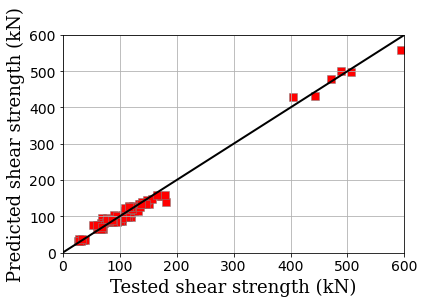

In [31]:
# plot the results by AdaBoost
xx = np.linspace(0, 600, 100)
yy = xx

plt.figure()
plt.plot(xx, yy, c='k', linewidth=2)
plt.scatter(y_train, Z1, marker='s', s=80, c='r', edgecolor='grey', linewidth=0.5)
# plt.scatter(y_test, Z2, marker='s')

plt.grid()
# plt.legend(['y=x','Training set','Testing set'], loc = 'upper left', fontproperties(family='serif') )

plt.tick_params (axis='both',which='major',labelsize=14)

font1 = {'family' : 'serif',
'weight' : 'normal',
'size'   : 18,
}
plt.axis('tight')
plt.xlabel('Tested shear strength (kN)', font1)
plt.ylabel('Predicted shear strength (kN)', font1)
plt.xlim([0, 600])
plt.ylim([0, 600])

plt.tight_layout()
plt.savefig('Fig4a.eps')
